In [1]:
setwd('C:/Users/dkestenbaum/Documents/GitHub/marketing_datamart/gambeling_analysis')

In [2]:
load('DataGroupAssignment.Rdata')

In [3]:
library('dplyr')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
options(scipen = 20)

In [5]:
install.packages('egg')

package 'egg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dkestenbaum\AppData\Local\Temp\RtmpeAz3Tm\downloaded_packages


In [6]:
install.packages('grid')

Warning message:
"package 'grid' is not available (for R version 3.6.1)"Warning message:
"package 'grid' is a base package, and should not be updated"

In [7]:
library('egg')

Warning message:
"package 'egg' was built under R version 3.6.3"Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [8]:
library('grid')

In [9]:
library('ggplot2')

In [10]:
UserDailyAggregation$Date <- as.Date(UserDailyAggregation$Date,format = '%Y%m%d')

In [11]:
Demographics$FirstPay <- as.Date(Demographics$FirstPay, format = '%Y%m%d')

In [12]:
Demographics_paydate <- Demographics %>% select(UserID,FirstPay)

In [13]:
UserDailyAggregation_2 <- left_join(UserDailyAggregation,Demographics_paydate,by = 'UserID')

In [14]:
UserDailyAggregation_2 <- UserDailyAggregation_2 %>% filter(Date >= FirstPay)

In [15]:
UserDailyAggregation_3 <- UserDailyAggregation_2 %>% group_by(UserID) %>% summarise(total_stakes = sum(Stakes), total_bets = sum(Bets),total_winning = sum(Winnings), average_stakes = mean(Stakes), average_bets = mean(Bets), average_winning = mean(Winnings), max_stakes = max(Stakes), max_bets = max(Bets), max_winning = max(Winnings),min_stakes = min(Stakes), min_bets = min(Bets),min_winning = min(Winnings))

In [16]:
UserDailyAggregation_3$count <- UserDailyAggregation_2 %>% count(UserID)

In [17]:
recency_Date <- max(UserDailyAggregation_2$Date)

In [18]:
#calculate recency and frequency
UserDailyAggregation_recency <- UserDailyAggregation_2 %>% group_by(UserID) %>% summarise(recency = as.numeric(recency_Date - max(Date)), frequency = n())

In [19]:
#calculate monetary value check
UserDailyAggregation_value <- UserDailyAggregation_2 %>% group_by(UserID) %>% summarise(monetary_value = sum(Winnings)) 

In [20]:
#Merge the tables to get recency,frequency and lifetime value
UserDailyAggregation_rfm <- left_join(UserDailyAggregation_recency,UserDailyAggregation_value,by='UserID')

In [21]:
#calculate RFM Score
UserDailyAggregation_rfm <- UserDailyAggregation_rfm %>% mutate(rfm_score = recency + frequency + monetary_value)

In [22]:
head(UserDailyAggregation_rfm)

UserID,recency,frequency,monetary_value,rfm_score
1324354,0,136,11736.6100,11872.6100
1324355,1,106,464.5000,571.5000
1324356,18,75,910.6600,1003.6600
1324358,147,9,209.8575,365.8575
1324360,5,32,43.1573,80.1573
1324362,13,7,0.0000,20.0000


In [23]:
scatter_plot_monetary_value <- ggplot(UserDailyAggregation_rfm, aes(x=frequency,y=monetary_value,color=recency)) + ggtitle('Gambler total winnings against frequency') + xlab('Frequency (days)') + ylab('Total winnings (Euros)') + annotate(geom='text',x = 175, y= 1070000, label='Gambler ID with highest winnings',color='blue')

In [24]:
#add extreme outlier labeling 
#code adapted and inspired from this forum thread: https://stackoverflow.com/questions/1923273/counting-the-number-of-elements-with-the-values-of-x-in-a-vector
scatter_plot_monetary_value_1 <- lapply(UserDailyAggregation_rfm[1], function(data) scatter_plot_monetary_value + geom_jitter(alpha=0.5) + theme_light(base_size=11) + theme(plot.title = element_text(hjust = 0.5)) + geom_text(aes(label= ifelse(UserDailyAggregation_rfm$monetary_value > quantile(UserDailyAggregation_rfm$monetary_value, 0.9999999),as.character(UserDailyAggregation_rfm$UserID),'')),hjust=0,vjust=0))

$UserID


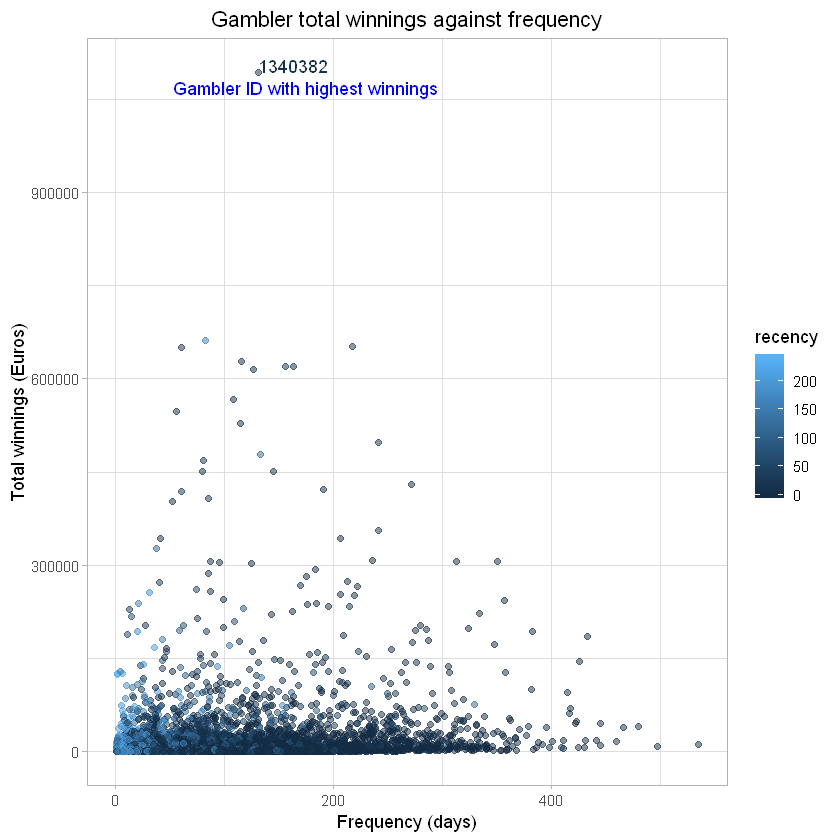

In [25]:
scatter_plot_monetary_value_1

In [26]:
#create temporary dataframe for grouping
UserDailyAgg_temp <- merge(UserDailyAggregation_2, UserDailyAggregation_rfm,by='UserID')

In [27]:
date_avg_winnings <- UserDailyAgg_temp %>% group_by(Date) %>% summarize(avg_daily_winnings = mean(monetary_value))

In [28]:
head(date_avg_winnings)

Date,avg_daily_winnings
2005-02-01,5108.669
2005-02-02,6716.299
2005-02-03,5947.567
2005-02-04,4669.941
2005-02-05,3905.379
2005-02-06,4262.218


In [29]:
x_tick_labels = c('Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct')

In [30]:
#create line plot for date against average winnings
line_plot_winnings_against_date <- ggplot(date_avg_winnings,aes(x=Date,y=avg_daily_winnings)) + geom_line(color='#85bb65') + ggtitle('Total gambler winnings against month of 2005') + scale_x_discrete(breaks=0:8,labels=x_tick_labels)

In [31]:
line_plot_winnings_against_date <- line_plot_winnings_against_date + theme_light(base_size=11) + theme(plot.title = element_text(hjust = 0.5))

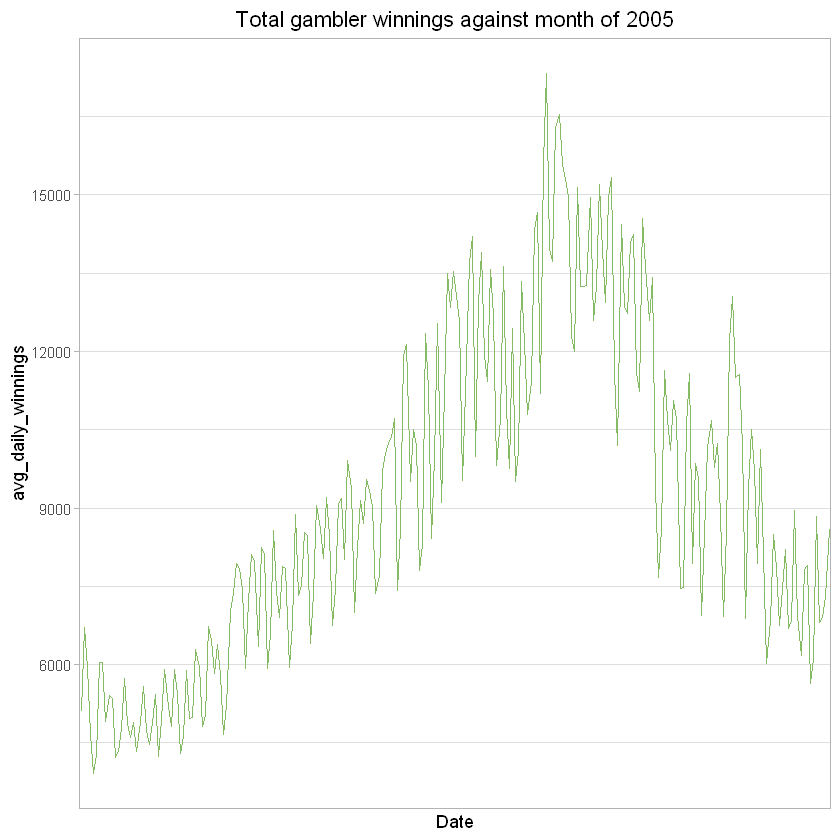

In [32]:
line_plot_winnings_against_date